### Module 4: BackTesting

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics

### Loading the Predicted Price

In [2]:
KSE100 = pd.read_csv('Input/KSE100.csv')
filtered = KSE100['Ticker'].tolist()

In [3]:
df1 = pd.DataFrame(columns = ['signal', 'price', 'total_shares', 'transaction', 'wallet'])
df2 = pd.DataFrame(columns = ['signal', 'wallet', 'profit'])
df3 = pd.DataFrame(columns = ['name','initial','final','percentage'])
profit_list = []

In [4]:
def model4(name,temp,money,percent):
    global df1
    global df2
    global df3
    global profit_list
    initial_money = money
    bought = False
    total_shares = 0
    df1.drop(df1.index, inplace=True)
    df2.drop(df2.index, inplace=True)
    df1 = df1.append({'price': 0, 'signal' : 0 , 'total_shares' : 0 , 'transaction' : 0, 'wallet': money }, ignore_index=True)
    df2 = df2.append({'signal' : 0 , 'wallet': money, 'profit' : initial_money - money}, ignore_index=True)

    for i in range(1,len(temp)):
        money_to_use = money * percent / 100
        if (temp['Pred'][i] == 1):
            if (money_to_use > temp['Close'][i]):
                num_shares = math.floor(money_to_use / temp['Close'][i])
                total_shares = total_shares + num_shares
                money = money - (num_shares * temp['Close'][i])
                bought_price = temp['Close'][i]
                bought = True
                df1 = df1.append({'price': temp['Close'][i], 'signal' : 1, 'total_shares' : total_shares, 'transaction': total_shares * temp['Close'][i], 'wallet' : money}, ignore_index=True)

        elif (temp['Pred'][i] == -1) and (bought == True):
            money = money + (total_shares * temp['Close'][i])
            df1 = df1.append({'price': temp['Close'][i], 'signal' : -1 , 'total_shares' : total_shares, 'transaction': total_shares * temp['Close'][i], 'wallet' : money}, ignore_index=True)
            df2 = df2.append({'signal' : -1 , 'wallet': money, 'profit' : money - initial_money}, ignore_index=True)
            bought = False
            total_shares = 0

        else:
            df1 = df1.append({'price': temp['Close'][i], 'signal' : temp['Pred'][i]  , 'total_shares' : total_shares, 'transaction': total_shares * temp['Close'][i], 'wallet' : money}, ignore_index=True)

    if bought == True:
        money = money + (total_shares * temp['Close'][i])
        total_shares = 0

    df1 = df1.append({'price': 0, 'signal' : 0 , 'total_shares' : 0, 'transaction': 0, 'wallet': money}, ignore_index=True)
    prof = float ((money - initial_money) / initial_money * 100) 

    print('Initial Wallet = ', initial_money)
    print('Percentage Profit = ', prof)
    print('Final Wallet = ', money)

    profit_list.append(prof)
    df3 = df3.append({'name': name, 'initial' : initial_money , 'final' : money, 'percentage': prof}, ignore_index=True)
    print('\n')
    
    if name == 'HBL PA Equity':
        plt.figure(figsize=(15, 5))
        plt.bar(df1.index, df1['wallet'], color ='maroon',
        width = 0.4)
        
        plt.show()
        plt.figure(figsize=(15, 5))
        plt.plot(df1.index,df1['wallet'])
        plt.title('Profit/Loss')
        plt.xlabel('Days')
        plt.ylabel('Wallet')
        plt.show()
        
        plt.figure(figsize=(15, 5))
        plt.plot(df2.index,df2['profit'])
        plt.title('Profit/Loss')
        plt.xlabel('Days')
        plt.ylabel('Profit')
        plt.show()

HBL PA Equity  Prediction on 50% Wallet
Initial Wallet =  100000
Percentage Profit =  54.85824709999992
Final Wallet =  154858.24709999992




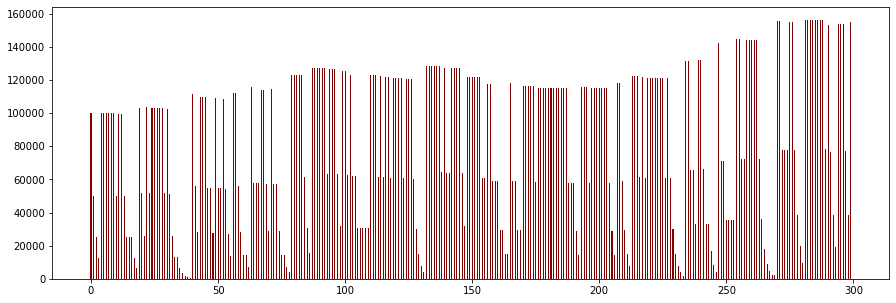

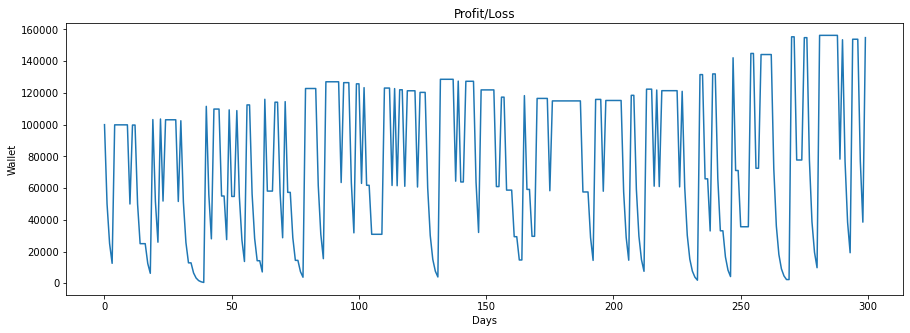

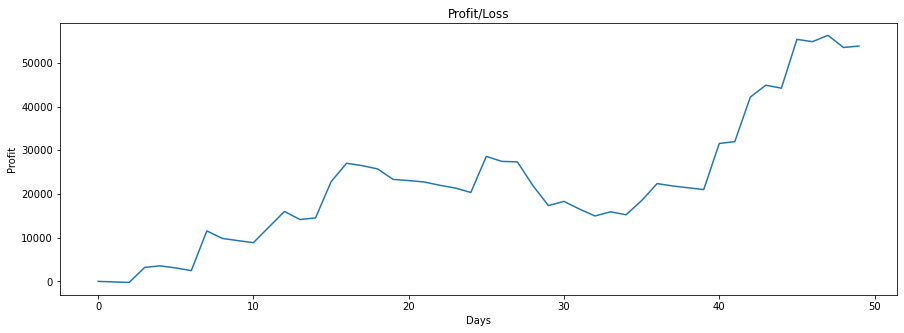

UBL PA Equity  Prediction on 50% Wallet
Initial Wallet =  100000
Percentage Profit =  47.91559350000002
Final Wallet =  147915.59350000002


HUBC PA Equity  Prediction on 50% Wallet
Initial Wallet =  100000
Percentage Profit =  10.77032449999993
Final Wallet =  110770.32449999993


MCB PA Equity  Prediction on 50% Wallet
Initial Wallet =  100000
Percentage Profit =  12.139671000000046
Final Wallet =  112139.67100000005


OGDC PA Equity  Prediction on 50% Wallet
Initial Wallet =  100000
Percentage Profit =  13.031931100000046
Final Wallet =  113031.93110000005


LUCK PA Equity  Prediction on 50% Wallet
Initial Wallet =  100000
Percentage Profit =  58.71171260000009
Final Wallet =  158711.7126000001


ENGRO PA Equity  Prediction on 50% Wallet
Initial Wallet =  100000
Percentage Profit =  7.954689800000021
Final Wallet =  107954.68980000002


PPL PA Equity  Prediction on 50% Wallet
Initial Wallet =  100000
Percentage Profit =  26.820047500000044
Final Wallet =  126820.04750000004


FFC PA

In [5]:
for name in filtered:
    fullName = 'Input/' + name + '.csv'
    file = pd.read_csv(fullName)
    print(name, ' Prediction on 50% Wallet')
    model4(name,file,100000,50)

### Calculating Profit/Loss

### Investing on 50% of Wallet

### List of Percentage Profits

In [6]:
df3.head()

,name,initial,final,percentage
0,HBL PA Equity,100000,154858.2471,54.858247
1,UBL PA Equity,100000,147915.5935,47.915594
2,HUBC PA Equity,100000,110770.3245,10.770324
3,MCB PA Equity,100000,112139.6710,12.139671
4,OGDC PA Equity,100000,113031.9311,13.031931


### Average Percentage Profit

In [7]:
statistics.mean(profit_list)

47.207995037999986